### This notebook created not for solve resistor classification problem!

This is the example how to use [ImageDataGenerator](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) class instead np.arrays as dataset for model fiting

In [ ]:
#@title Check runtime for nvidia graphics card
!nvidia-smi -L

In [1]:
import glob
from IPython.display import clear_output
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow import keras
import pandas as pd

In [2]:
#@title NN parameters
IMG_SIZE = 224 #@param {type:"integer"}
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

SPLIT_WEIGHTS = (8, 1, 1)
BATCH_SIZE = 32 #@param {type:"integer"}
SHUFFLE_BUFFER_SIZE = 1000

### Use dataset from
[kaggle resistors dataset](https://www.kaggle.com/datasets/eralpozcan/resistor-dataset)

Extract files to `_resistors_dataset` folder before run next steps!

In [5]:
# Dataset size
dataset_size = len(list(glob.glob(f'_resistors_dataset/*/*.jpg')))

# Class labels
class_labels = (list(glob.glob(f'_resistors_dataset/*')))
class_labels = [f.split('/')[-1] for f in class_labels]

# Num classess
num_classes = len(class_labels)

# Loading in the data
data_generator = tf.keras.preprocessing.image_dataset_from_directory(directory='_resistors_dataset',
                                                                     label_mode='categorical',
                                                                     image_size=(IMG_SIZE, IMG_SIZE),
                                                                     batch_size=BATCH_SIZE,
                                                                     shuffle=True)

full_dataset = tf.data.Dataset.from_generator(lambda: data_generator,
                     output_types=(tf.float32, tf.float32),
                     output_shapes=([None, IMG_SIZE, IMG_SIZE, 3],
                                    [None, num_classes])
                     )

Found 2881 files belonging to 37 classes.


In [6]:
#@title Split dataset for train and validation datasets

train_size = int(0.8 * dataset_size / BATCH_SIZE)
val_size = int(0.2 * dataset_size / BATCH_SIZE)

train_dataset = full_dataset.take(train_size)
val_dataset = full_dataset.skip(train_size)

print(f'Dataset batch sizes: {train_size}/{val_size}')

Dataset batch sizes: 72/18


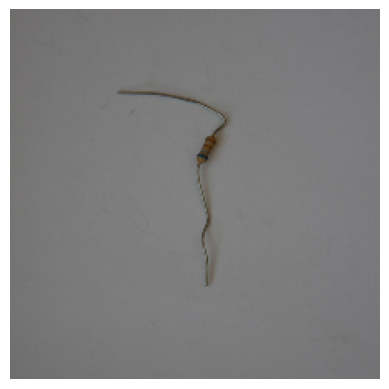

In [7]:
#@title Show random image from dataset

images = val_dataset.map(lambda x, y: (x))
images = np.array([x for x in images.take(1)]).reshape(BATCH_SIZE, IMG_SIZE, IMG_SIZE, 3)

index = np.random.choice(len(images))
img = images[index]
img = img.reshape(IMG_SHAPE)

plt.imshow((img.reshape(IMG_SHAPE)).astype(np.uint8), vmin=0, vmax=255)
plt.axis("off")
plt.show()

In [8]:
#@title MobileNetV2 model

base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE, include_top=False)

model = tf.keras.Sequential([
  base_model,
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(num_classes)
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=['categorical_accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten (Flatten)           (None, 62720)             0         
                                                                 
 dropout (Dropout)           (None, 62720)             0         
                                                                 
 dense (Dense)               (None, 37)                2320677   
                                                                 
Total params: 4,578,661
Trainable params: 4,544,549
Non-trainable params: 34,112
_________________________________________________________________


In [9]:
#@title Train model
epochs = 100 #@param {type:"slider", min:1, max:55, step:1}

%time score = model.fit(train_dataset, validation_data=val_dataset, epochs=epochs)

Epoch 1/100
72/72 [==============================] - 20s 181ms/step - loss: 3.1344 - categorical_accuracy: 0.2643 - val_loss: 7.7874 - val_categorical_accuracy: 0.0728
Epoch 2/100
72/72 [==============================] - 12s 158ms/step - loss: 0.5823 - categorical_accuracy: 0.8325 - val_loss: 6.4337 - val_categorical_accuracy: 0.0901
Epoch 3/100
72/72 [==============================] - 12s 164ms/step - loss: 0.2578 - categorical_accuracy: 0.9323 - val_loss: 6.2473 - val_categorical_accuracy: 0.1213
Epoch 4/100
72/72 [==============================] - 12s 161ms/step - loss: 0.1289 - categorical_accuracy: 0.9635 - val_loss: 5.3913 - val_categorical_accuracy: 0.1456
Epoch 5/100
72/72 [==============================] - 12s 163ms/step - loss: 0.0931 - categorical_accuracy: 0.9783 - val_loss: 5.1522 - val_categorical_accuracy: 0.1629
Epoch 6/100
72/72 [==============================] - 12s 161ms/step - loss: 0.0589 - categorical_accuracy: 0.9857 - val_loss: 4.7232 - val_categorical_accuracy:

72/72 [==============================] - 12s 159ms/step - loss: 0.0378 - categorical_accuracy: 0.9887 - val_loss: 1.3300 - val_categorical_accuracy: 0.7834
Epoch 50/100
72/72 [==============================] - 12s 160ms/step - loss: 0.0316 - categorical_accuracy: 0.9905 - val_loss: 1.3648 - val_categorical_accuracy: 0.8042
Epoch 51/100
72/72 [==============================] - 12s 162ms/step - loss: 0.0593 - categorical_accuracy: 0.9865 - val_loss: 1.2846 - val_categorical_accuracy: 0.7903
Epoch 52/100
72/72 [==============================] - 12s 164ms/step - loss: 0.0465 - categorical_accuracy: 0.9857 - val_loss: 1.2648 - val_categorical_accuracy: 0.8076
Epoch 53/100
72/72 [==============================] - 12s 160ms/step - loss: 0.0217 - categorical_accuracy: 0.9918 - val_loss: 0.9969 - val_categorical_accuracy: 0.8354
Epoch 54/100
72/72 [==============================] - 12s 159ms/step - loss: 0.0109 - categorical_accuracy: 0.9961 - val_loss: 1.0064 - val_categorical_accuracy: 0.8319

72/72 [==============================] - 14s 186ms/step - loss: 0.0559 - categorical_accuracy: 0.9883 - val_loss: 1.2084 - val_categorical_accuracy: 0.8544
Epoch 98/100
72/72 [==============================] - 12s 159ms/step - loss: 0.0618 - categorical_accuracy: 0.9861 - val_loss: 1.6370 - val_categorical_accuracy: 0.8146
Epoch 99/100
72/72 [==============================] - 12s 161ms/step - loss: 0.0582 - categorical_accuracy: 0.9822 - val_loss: 1.2091 - val_categorical_accuracy: 0.8683
Epoch 100/100
72/72 [==============================] - 12s 158ms/step - loss: 0.0218 - categorical_accuracy: 0.9935 - val_loss: 1.3262 - val_categorical_accuracy: 0.8562
CPU times: user 1h 6min 11s, sys: 28min 7s, total: 1h 34min 18s
Wall time: 20min 4s


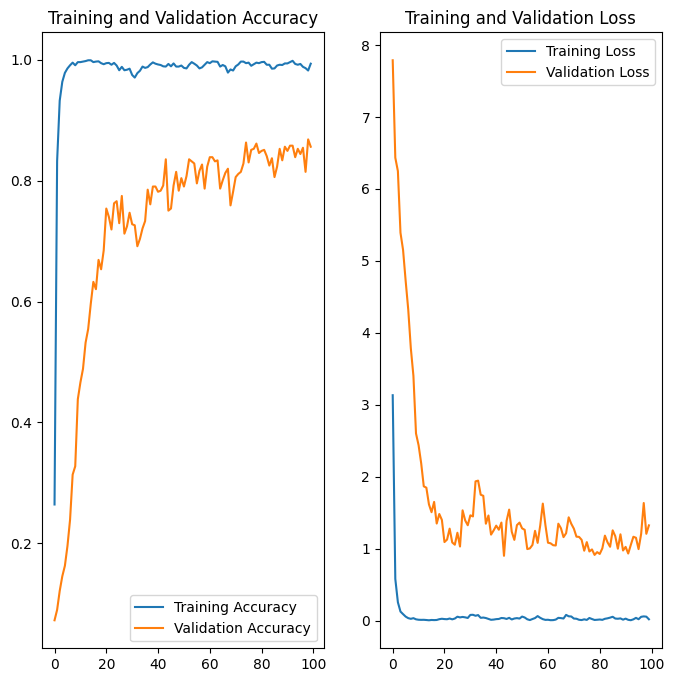

In [10]:
#@title Train history

acc = score.history['categorical_accuracy']
val_acc = score.history['val_categorical_accuracy']

loss = score.history['loss']
val_loss = score.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [11]:
# Create model for make predictions
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])


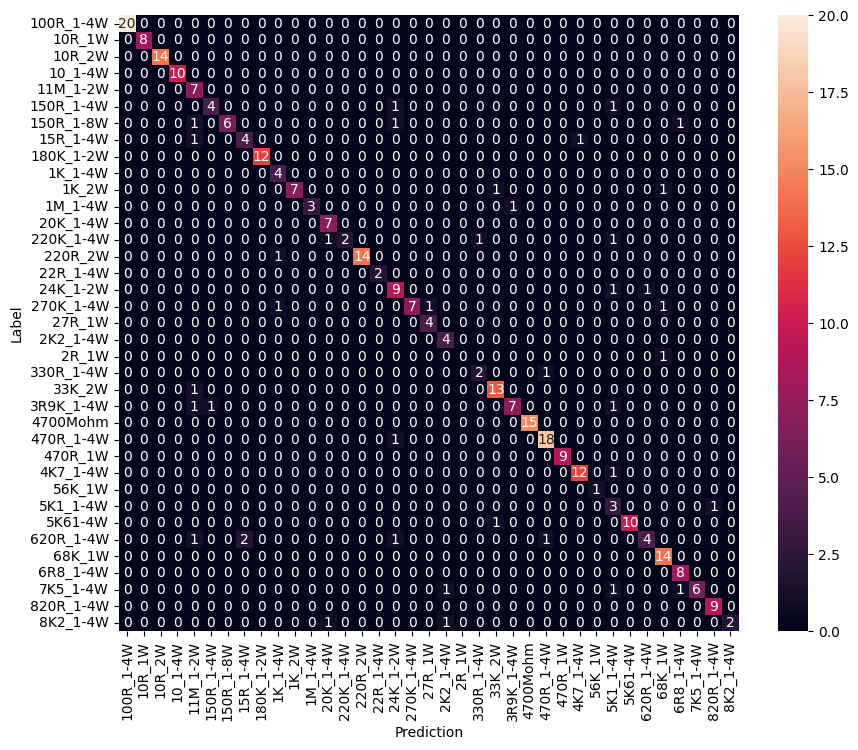

In [12]:
#@title Confusion matrix
import seaborn as sns

# Prepare data (convert DataGenerator to np array)
vds = val_dataset.map(lambda x, y: ((x, y), y))

val_x = []
val_y = []

for x, y in vds.take(10):
    input1, input2 = x
    val_x.append(input1)
    val_y.append(input2)
    
val_y = np.array(val_y).reshape(BATCH_SIZE * 10, num_classes)
val_x = np.array(val_x).reshape(BATCH_SIZE * 10, IMG_SIZE, IMG_SIZE, 3)

def show_confusion_matrix(cm, labels):
  plt.figure(figsize=(10, 8))
  sns.heatmap(cm, xticklabels=labels, yticklabels=labels, annot=True, fmt='g')
  plt.xlabel('Prediction')
  plt.ylabel('Label')
  plt.show()

# True labels
val_y_s = [np.argmax(x) for x in val_y]

# Predicted labels
data_x_predicted = probability_model.predict(val_x, verbose=0)
data_x_predicted = [np.argmax(r) for r in data_x_predicted]

confusion_mtx = tf.math.confusion_matrix(val_y_s, data_x_predicted, num_classes=len(class_labels))

show_confusion_matrix(confusion_mtx, class_labels)

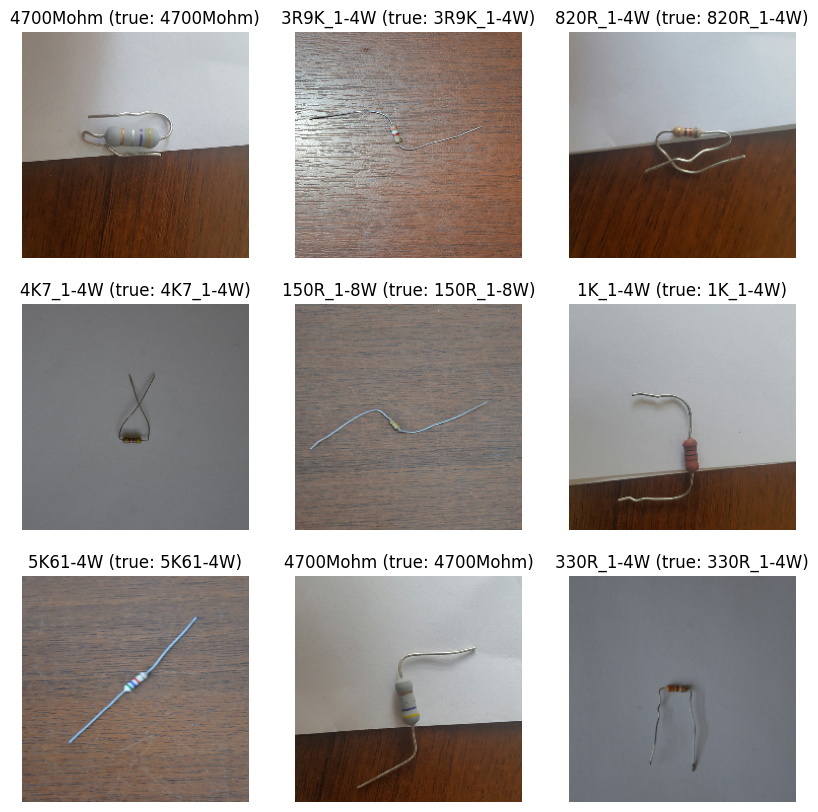

In [13]:
#@title Make 9 predictions
indexes = np.random.choice(len(data_x_predicted), 9)

plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    img = val_x[indexes[i]]
    img = img.reshape(1, IMG_SIZE, IMG_SIZE, 3)
  
    true_class = class_labels[val_y_s[indexes[i]]]
    predicted_class = class_labels[data_x_predicted[indexes[i]]]

    str_result = f"{true_class} (true: {predicted_class})"
    plt.title(str_result)
    plt.axis("off")
    plt.imshow((img.reshape(IMG_SIZE, IMG_SIZE, 3)).astype(np.uint8))
    
plt.show()

In [15]:
#@title Convert model

model_name = 'mobilenet2_resistor_classificator_v1.0_224' #@param {type:"string"}

# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# Comment this line if you run this notebook in google colab!
drive_path = 'resistor_classificator_v1-classificator/model'
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

save_model = True #@param {type:"boolean"}
if save_model:
    print(f'Saving model to {drive_path}/{model_name}.h5')
    model.save(f'{drive_path}/{model_name}.h5')
    print(f'Saved')


save_tfjs_model = True  #@param {type:"boolean"}
if save_tfjs_model:
    !pip install tensorflowjs
    import tensorflowjs as tfjs
    clear_output()
    tfjs.converters.save_keras_model(model, f"{drive_path}/{model_name}")


save_tflite_model = True #@param {type:"boolean"}
if save_tflite_model:
    print(f'Saving model to {drive_path}/{model_name}.tflite')
    converter = tf.lite.TFLiteConverter.from_keras_model(model)
    tflite_model = converter.convert()

    with open(f'{drive_path}/{model_name}.tflite', 'wb') as f:
        f.write(tflite_model)
        print(f'Saved')


save_tflite_quant_model = True #@param {type:"boolean"}
if save_tflite_quant_model:
    print(f'Saving quant model to {drive_path}/{model_name}_quant.tflite')
    # A generator that provides a representative dataset
    def representative_data_gen():
        for image in images[:100]:
          im = image.reshape(1, IMG_SHAPE[0], IMG_SHAPE[0], IMG_SHAPE[2]).astype(np.float32)
          yield [im]

    converter = tf.lite.TFLiteConverter.from_keras_model(model)
    # This enables quantization
    converter.optimizations = [tf.lite.Optimize.DEFAULT]
    # This sets the representative dataset for quantization
    converter.representative_dataset = representative_data_gen
    # This ensures that if any ops can't be quantized, the converter throws an error
    converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
    # For full integer quantization, though supported types defaults to int8 only, we explicitly declare it for clarity.
    converter.target_spec.supported_types = [tf.int8]
    # These set the input and output tensors to uint8 (added in r2.3)
    converter.inference_input_type = tf.uint8
    converter.inference_output_type = tf.uint8
    tflite_model = converter.convert()


    with open(f'{drive_path}/{model_name}_quant.tflite', 'wb') as f:
        f.write(tflite_model)
        print(f'Saved')

Saving model to resistor_classificator_v1-classificator/model/mobilenet2_resistor_classificator_v1.0_224.tflite


INFO:tensorflow:Assets written to: /tmp/tmp6zeocrm2/assets


INFO:tensorflow:Assets written to: /tmp/tmp6zeocrm2/assets


Saved
Saving quant model to resistor_classificator_v1-classificator/model/mobilenet2_resistor_classificator_v1.0_224_quant.tflite


INFO:tensorflow:Assets written to: /tmp/tmpc7xgmruf/assets


INFO:tensorflow:Assets written to: /tmp/tmpc7xgmruf/assets
/usr/local/lib/python3.8/dist-packages/tensorflow/lite/python/convert.py:766: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


Saved
